# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow.

```
X_train: 10000 samples * 5 times of training
X_test: 10000 samples

* used (X_test, Y_test) in validation data.

batch_size: 128
epochs: 100
```

In [2]:
import pickle

def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# import metadata
metadata = unpickle('clf_data/batches.meta')
labels = metadata[b'label_names']
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [5]:
# import train batch
dataset = unpickle('clf_data/data_batch_1')

X_train = [dataset[b'data']]
y_train = [dataset[b'labels']]

for i in range(2,6):
    batch = unpickle(f'clf_data/data_batch_{i}')
    batch_X = batch[b'data']
    batch_y = batch[b'labels']
    
    X_train.append(batch_X)
    y_train.append(batch_y)

[_.shape for _ in X_train]

[(10000, 3072), (10000, 3072), (10000, 3072), (10000, 3072), (10000, 3072)]

In [6]:
# import test batch
dataset_test = unpickle('clf_data/test_batch')

X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']

X_test.shape, len(y_test)

((10000, 3072), 10000)

In [7]:
X_train = [_batch / 255.0 for _batch in X_train]
X_test = X_test / 255.0
X_train[0][0]

array([0.23137255, 0.16862745, 0.19607843, ..., 0.54901961, 0.32941176,
       0.28235294])

## Data categorize / reshape

In [8]:
import tensorflow as tf

In [37]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten, Convolution3D, Reshape

In [10]:
output_dim = nb_classes = 10

In [60]:
input_dim = (32,32,3)
X_train = [_batch.reshape(10000, *input_dim) for _batch in X_train]
X_test = X_test.reshape(10000, *input_dim)

[_.shape for _ in X_train]

[(10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3)]

In [61]:
X_train = [_batch.astype('float32') for _batch in X_train]
X_test = X_test.astype('float32')
Y_train = [np_utils.to_categorical(_batch, nb_classes) for _batch in y_train]
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [62]:
input_dim, X_train[0].shape, Y_train[0].shape

((32, 32, 3), (10000, 32, 32, 3), (10000, 10))

## Build Model

In [64]:
model = Sequential()

# 32,32
model.add(Convolution2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(5,1, activation='relu'))

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10))

model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size=100
epochs=10

In [65]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_35 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_36 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 5)         325       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 16)      

In [66]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy','mse'])

In [67]:
history = []

for i in range(5):
    hist = model.fit(X_train[i], Y_train[i],
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
    history.append(hist)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 19s 2ms/sample - loss: 2.1849 - accuracy: 0.2031 - val_loss: 2.2645 - val_accuracy: 0.1826
Epoch 2/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.1114 - accuracy: 0.2422 - val_loss: 2.2384 - val_accuracy: 0.1754
Epoch 3/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.0605 - accuracy: 0.2679 - val_loss: 2.2023 - val_accuracy: 0.1896
Epoch 4/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 2.0143 - accuracy: 0.2788 - val_loss: 2.1983 - val_accuracy: 0.1829
Epoch 5/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.9699 - accuracy: 0.3093 - val_loss: 2.0025 - val_accuracy: 0.2862
Epoch 6/10
10000/10000 [==============================] - 18s 2ms/sample - loss: 1.9267 - accuracy: 0.3245 - val_loss: 1.9537 - val_accuracy: 0.3031
Epoch 7/10
10000/10000 [==============================] 

In [68]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 1.4561574445724488
Test accuracy: 0.4985


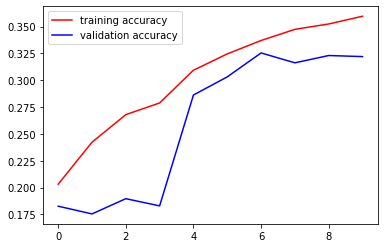

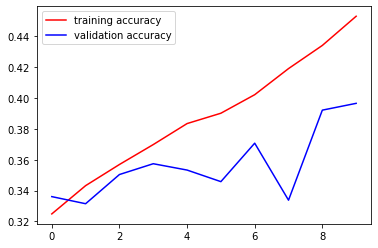

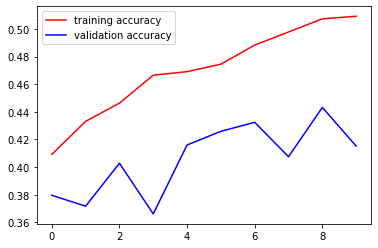

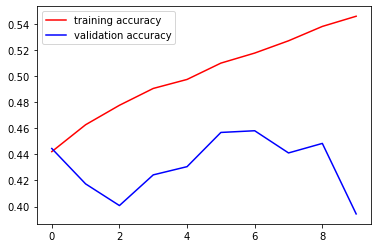

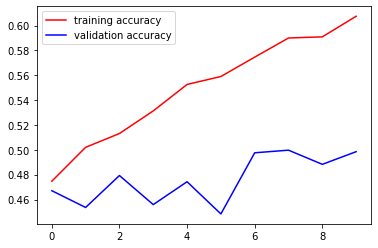

In [69]:
for i in range(len(history)):
    plt.plot(history[i].history['accuracy'],'r')
    plt.plot(history[i].history['val_accuracy'],'b')
    plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
    plt.show()

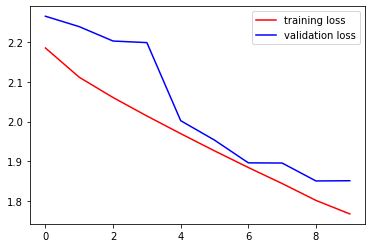

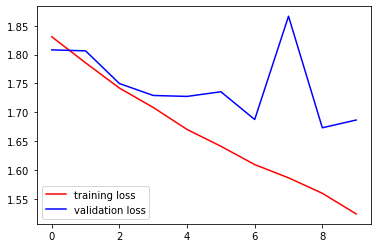

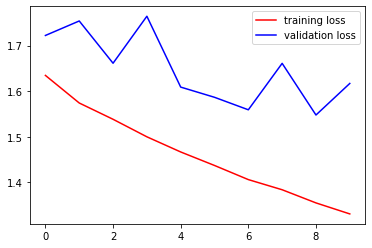

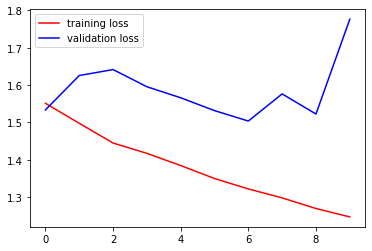

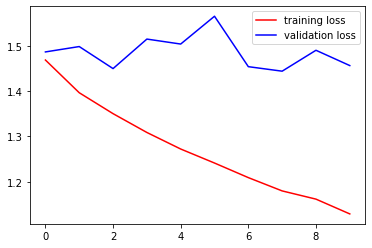

In [70]:
for i in range(len(history)):
    plt.plot(history[i].history['loss'],'r')
    plt.plot(history[i].history['val_loss'],'b')
    plt.legend({'training loss':'r', 'validation loss': 'b'})
    plt.show()

## Inference

In [71]:
predictions = model.predict_classes(X_test)

In [72]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


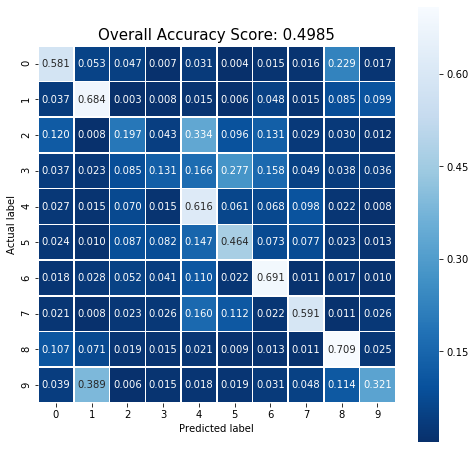

In [73]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();